# Parametric Study
A parametric study to explore the buckling strength vs. weight
## Burst Pressure vs. Num Cells

[6, 0.025, 0.15, 0.03, 6]
5.999999999999999
General Instability - 2783.5 k/in  52993 klbf
Skin Buckling       - 167.3 k/in   3185 klbf
Rib Cripling        - 6509.4 k/in 123927 klbf
[6, 0.025, 0.15, 0.03, 12]
5.999999999999999
General Instability - 3870.5 k/in  73686 klbf
Skin Buckling       - 705.0 k/in  13423 klbf
Rib Cripling        - 6858.9 k/in 130580 klbf
[6, 0.025, 0.15, 0.03, 16]
5.999999999999999
General Instability - 4459.7 k/in  84904 klbf
Skin Buckling       - 1296.0 k/in  24673 klbf
Rib Cripling        - 7091.9 k/in 135015 klbf
[6, 0.025, 0.12, 0.03, 16]
4.8
General Instability - 3322.4 k/in  63251 klbf
Skin Buckling       - 1261.9 k/in  24024 klbf
Rib Cripling        - 10789.8 k/in 205417 klbf
[6, 0.025, 0.1, 0.03, 16]
4.0
General Instability - 2646.1 k/in  50376 klbf
Skin Buckling       - 1239.2 k/in  23592 klbf
Rib Cripling        - 15257.8 k/in 290479 klbf
[6, 0.025, 0.08, 0.03, 16]
3.1999999999999997
General Instability - 2046.1 k/in  38954 klbf
Skin Buckling       - 1

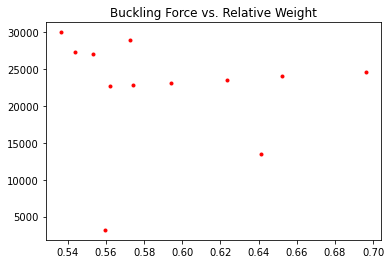

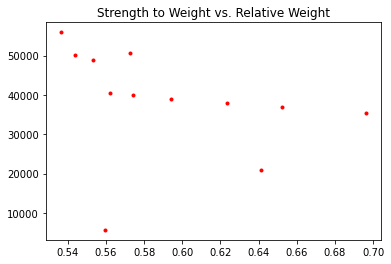

In [1]:
import math
import matplotlib.pyplot as plt


# Requirements
safety_factor = 1.5 # LV4 requirement 3.2.4.15

# Material properties 
E = 69.0 # Young's Modules, GPa for Al 6061-T6
E_imp = 10000*1000 # PSI
nu = 0.33 # Poisson's Ratio for Al 6061-T6
material_name = '6061-T6'
welded_tensile_strength = 24000 # psi
F_ty = 40 # ksi
F_tu = 45 # ksi

# Instability
c0 = 0.397    # 4.2.005
c1 = 10.2     # 4.2.006
c2 = 0.616    # 4.2.008

# Common Properties
flanges = False

# Parametric Space
# ID, wall_t
module_options = [[6,0.025,0.15,0.03,6],
                  [6,0.025,0.15,0.03,12],
                  [6,0.025,0.15,0.03,16],
                  [6,0.025,0.12,0.03,16],
                  [6,0.025,0.1,0.03,16],
                  [6,0.025,0.08,0.03,16],
                  [6,0.025,0.08,0.025,16],
                  [6,0.025,0.07,0.025,16],
                  [6,0.025,0.07,0.025,18],
                  [6,0.025,0.056,0.025,18],
                  [6,0.025,0.062,0.02,18],
                  [6,0.0255,0.096,0.01,18]]
results = []
for module in module_options:
    print(module)
    module_id = module[0]
    skin_t = module[1]
    rib_depth = module[2]
    rib_t = module[3]
    num_radial_divisions = module[4]
    module_od = module_id+2*rib_t
    module_r = module_od/2
    rel_weight_data = []
    pattern_size = module_od*math.pi/num_radial_divisions
    cell_height = pattern_size
    alpha = (rib_t*rib_depth)/(skin_t*cell_height) # Web non-dimensional ratio, pg. 2.0.008
    delta = rib_depth/skin_t # rib depth to skin thickness ratio, pg. 2.0.008
    print(delta)
    if flanges == False:
        beta = (3*alpha*(1+delta)**2+(1+alpha)*(1+alpha*delta**2))**0.5
        t_star = skin_t*beta/(1+alpha) # equivilent thickness, Eq. 2.5.3
        t_bar = skin_t*(1+3*alpha)
        E_star = E*(1+alpha)**2.0/beta # equivilent Young's Modulus Eq. 2.5.4#
        
    # Classical Value
    #N_cl = (1/(3*(1-nu*nu))**0.5)*E_star_imp/1000*t_star*t_star/module_r # k/in

    #N_a = F/(2*math.pi*module_r) # k/in
    #N_b = M/(math.pi*module_r**2) # k/in
    #N_cr = N_a + N_b

    N_cr_1 = c0*E_imp*skin_t*skin_t/module_r*beta
    N_cr_2 = c1*E_imp*skin_t*(1+alpha)*(skin_t*skin_t)/(pattern_size*pattern_size)
    N_cr_3 = c2*E_imp*skin_t*(1+alpha)*(rib_t*rib_t)/(rib_depth*rib_depth)
    
    F_cr_1 = N_cr_1*2*math.pi*module_r
    F_cr_2 = N_cr_2*2*math.pi*module_r
    F_cr_3 = N_cr_3*2*math.pi*module_r
    
    print('General Instability - {:4.1f} k/in {:6.0f} klbf'.format(N_cr_1,F_cr_1))
    print('Skin Buckling       - {:4.1f} k/in {:6.0f} klbf'.format(N_cr_2,F_cr_2))
    print('Rib Cripling        - {:4.1f} k/in {:6.0f} klbf'.format(N_cr_3,F_cr_3))
            
    cs_area = t_bar*2*math.pi*(module_r+t_bar/2)
    rel_weight_data.append(cs_area)
    results.append([module_id, cs_area, min(F_cr_1,F_cr_2,F_cr_3)])

# Buckling
buckling_plot = plt.figure(1)
plt.title('Buckling Force vs. Relative Weight')
for item in results:
    plt.plot(item[1], item[2], 'r.', label='id_'+str(item[0]))
#plt.legend()

# Strength to Weight
stw_plot = plt.figure(2)
plt.title('Strength to Weight vs. Relative Weight')
for item in results:
    ratio = item[2]/item[1]
    plt.plot(item[1], ratio, 'r.', label='id_'+str(item[0]))
#plt.legend()



[ID, skin thickness, rib depth, rib width, radial divisions]
[12, 0.025, 0.05, 0.025, 24]
2.0
General Instability - 585.1 k/in  22149 klbf
Skin Buckling       - 660.9 k/in  25018 klbf
Rib Crippling        - 39720.4 k/in 1503663 klbf
Critical Load - 22148.9 klbf
cross section area - 1.039 in^2
strength to weight - 21322.461 lbf/in^2

[ID, skin thickness, rib depth, rib width, radial divisions]
[12, 0.025, 0.051, 0.025, 24]
2.0399999999999996
General Instability - 592.2 k/in  22418 klbf
Skin Buckling       - 661.3 k/in  25034 klbf
Rib Crippling        - 38201.5 k/in 1446162 klbf
Critical Load - 22417.7 klbf
cross section area - 1.041 in^2
strength to weight - 21543.682 lbf/in^2

[ID, skin thickness, rib depth, rib width, radial divisions]
[12, 0.025, 0.052, 0.025, 24]
2.0799999999999996
General Instability - 599.4 k/in  22692 klbf
Skin Buckling       - 661.7 k/in  25049 klbf
Rib Crippling        - 36768.9 k/in 1391930 klbf
Critical Load - 22691.6 klbf
cross section area - 1.042 in^2
stre

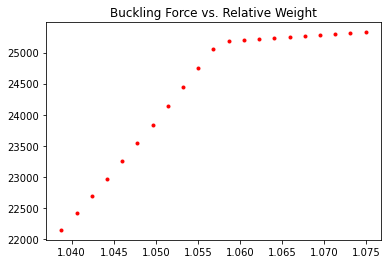

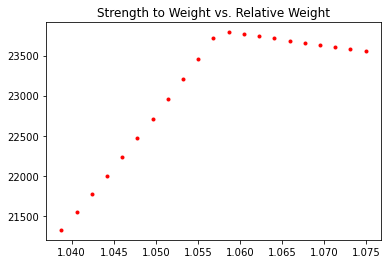

In [2]:
import math
import matplotlib.pyplot as plt


# Requirements
safety_factor = 1.5 # LV4 requirement 3.2.4.15

# Material properties 
E = 69.0 # Young's Modules, GPa for Al 6061-T6
E_imp = 10000*1000 # PSI
nu = 0.33 # Poisson's Ratio for Al 6061-T6
material_name = '6061-T6'
welded_tensile_strength = 24000 # psi
F_ty = 40 # ksi
F_tu = 45 # ksi

# Instability
c0 = 0.397    # 4.2.005
c1 = 10.2     # 4.2.006
c2 = 0.616    # 4.2.008

# Common Properties
flanges = False

# Parametric Space
# [ID, skin_t, rib_d, rib_t, num triangles]
module_options = [
                  [12, 0.025, 0.05, 0.025, 24],
                  [12, 0.025, 0.051, 0.025, 24],
                  [12, 0.025, 0.052, 0.025, 24],
                  [12, 0.025, 0.053, 0.025, 24],
                  [12, 0.025, 0.054, 0.025, 24],
                  [12, 0.025, 0.055, 0.025, 24],
                  [12, 0.025, 0.056, 0.025, 24],
                  [12, 0.025, 0.057, 0.025, 24],
                  [12, 0.025, 0.058, 0.025, 24],
                  [12, 0.025, 0.059, 0.025, 24],
                  [12, 0.025, 0.060, 0.025, 24],
                  [12, 0.025, 0.061, 0.025, 24],
                  [12, 0.025, 0.062, 0.025, 24],
                  [12, 0.025, 0.063, 0.025, 24],
                  [12, 0.025, 0.064, 0.025, 24],
                  [12, 0.025, 0.065, 0.025, 24],
                  [12, 0.025, 0.066, 0.025, 24],
                  [12, 0.025, 0.067, 0.025, 24],
                  [12, 0.025, 0.068, 0.025, 24],
                  [12, 0.025, 0.069, 0.025, 24],
                  [12, 0.025, 0.070, 0.025, 24],

#                  [12, 0.025, 0.03, 0.025, 18],
#                  [12, 0.025, 0.03, 0.025, 19],
#                  [12, 0.025, 0.03, 0.025, 20],
#                  [12, 0.025, 0.03, 0.025, 21],
#                  [12, 0.025, 0.03, 0.025, 22],
#                  [12, 0.025, 0.03, 0.025, 23],
#                  [12, 0.025, 0.03, 0.025, 24],
#                  [12, 0.025, 0.03, 0.025, 25],
#                  [12, 0.025, 0.03, 0.025, 26],

#                  [12, 0.025, 0.04, 0.025, 18],
#                  [12, 0.025, 0.04, 0.025, 19],
#                  [12, 0.025, 0.04, 0.025, 20],
#                  [12, 0.025, 0.04, 0.025, 21],
#                  [12, 0.025, 0.04, 0.025, 22],
#                  [12, 0.025, 0.04, 0.025, 23],
#                  [12, 0.025, 0.04, 0.025, 24],
#                  [12, 0.025, 0.04, 0.025, 25],
#                  [12, 0.025, 0.04, 0.025, 26],

#                  [12, 0.025, 0.05, 0.025, 18],
#                  [12, 0.025, 0.05, 0.025, 19],
#                  [12, 0.025, 0.05, 0.025, 20],
#                  [12, 0.025, 0.05, 0.025, 21],
#                  [12, 0.025, 0.05, 0.025, 22],
#                  [12, 0.025, 0.05, 0.025, 23],
#                  [12, 0.025, 0.05, 0.025, 24],
#                  [12, 0.025, 0.05, 0.025, 25],
#                  [12, 0.025, 0.05, 0.025, 26],

#                  [12, 0.025, 0.06, 0.025, 18],
#                  [12, 0.025, 0.06, 0.025, 19],
#                  [12, 0.025, 0.06, 0.025, 20],
#                  [12, 0.025, 0.06, 0.025, 21],
#                  [12, 0.025, 0.06, 0.025, 22],
#                  [12, 0.025, 0.06, 0.025, 23],
#                  [12, 0.025, 0.06, 0.025, 24],
#                  [12, 0.025, 0.06, 0.025, 25],
#                  [12, 0.025, 0.06, 0.025, 26],

#                  [12, 0.025, 0.07, 0.025, 18],
#                  [12, 0.025, 0.07, 0.025, 19],
#                  [12, 0.025, 0.07, 0.025, 20],
#                  [12, 0.025, 0.07, 0.025, 21],
#                  [12, 0.025, 0.07, 0.025, 22],
#                  [12, 0.025, 0.07, 0.025, 23],
#                  [12, 0.025, 0.07, 0.025, 24],
#                  [12, 0.025, 0.07, 0.025, 25],
#                  [12, 0.025, 0.07, 0.025, 26],
    
#                  [12, 0.025, 0.1, 0.025, 18],
#                  [12, 0.025, 0.1, 0.025, 19],
#                  [12, 0.025, 0.1, 0.025, 20],
#                  [12, 0.025, 0.1, 0.025, 21],
#                  [12, 0.025, 0.1, 0.025, 22],
#                  [12, 0.025, 0.1, 0.025, 23],
#                  [12, 0.025, 0.1, 0.025, 24],
#                  [12, 0.025, 0.1, 0.025, 18],
#                  [12, 0.025, 0.1, 0.025, 19],
#                  [12, 0.025, 0.1, 0.025, 20],
#                  [12, 0.025, 0.1, 0.025, 21],
#                  [12, 0.025, 0.1, 0.025, 22],
#                  [12, 0.025, 0.1, 0.025, 23],
#                  [12, 0.025, 0.1, 0.025, 24],
#                  [12, 0.025, 0.1, 0.025, 30],
#                  [12, 0.025, 0.1, 0.025, 31],
#                  [12, 0.025, 0.1, 0.025, 32],
#                  [12, 0.025, 0.1, 0.025, 33],
#                  [12, 0.025, 0.1, 0.025, 34],
#                  [12, 0.025, 0.1, 0.025, 35]
                 ]
results = []
for module in module_options:
    print("[ID, skin thickness, rib depth, rib width, radial divisions]")
    print(module)
    module_id = module[0]
    skin_t = module[1]
    rib_depth = module[2]
    rib_t = module[3]
    num_radial_divisions = module[4]
    module_od = module_id+2*rib_t
    module_r = module_od/2
    rel_weight_data = []
    pattern_size = module_od*math.pi/num_radial_divisions
    cell_height = pattern_size
    alpha = (rib_t*rib_depth)/(skin_t*cell_height) # Web non-dimensional ratio, pg. 2.0.008
    delta = rib_depth/skin_t # rib depth to skin thickness ratio, pg. 2.0.008
    print(delta)
    if flanges == False:
        beta = (3*alpha*(1+delta)**2+(1+alpha)*(1+alpha*delta**2))**0.5
        t_star = skin_t*beta/(1+alpha) # equivilent thickness, Eq. 2.5.3
        t_bar = skin_t*(1+3*alpha)
        E_star = E*(1+alpha)**2.0/beta # equivilent Young's Modulus Eq. 2.5.4#
        
    # Classical Value
    #N_cl = (1/(3*(1-nu*nu))**0.5)*E_star_imp/1000*t_star*t_star/module_r # k/in

    #N_a = F/(2*math.pi*module_r) # k/in
    #N_b = M/(math.pi*module_r**2) # k/in
    #N_cr = N_a + N_b

    N_cr_1 = c0*E_imp*skin_t*skin_t/module_r*beta
    N_cr_2 = c1*E_imp*skin_t*(1+alpha)*(skin_t*skin_t)/(pattern_size*pattern_size)
    N_cr_3 = c2*E_imp*skin_t*(1+alpha)*(rib_t*rib_t)/(rib_depth*rib_depth)
    
    F_cr_1 = N_cr_1*2*math.pi*module_r
    F_cr_2 = N_cr_2*2*math.pi*module_r
    F_cr_3 = N_cr_3*2*math.pi*module_r
    F_cr = min(F_cr_1,F_cr_2,F_cr_3)
    
    print('General Instability - {:4.1f} k/in {:6.0f} klbf'.format(N_cr_1,F_cr_1))
    print('Skin Buckling       - {:4.1f} k/in {:6.0f} klbf'.format(N_cr_2,F_cr_2))
    print('Rib Crippling        - {:4.1f} k/in {:6.0f} klbf'.format(N_cr_3,F_cr_3))
    print('Critical Load - {:4.1f} klbf'.format(F_cr))
    
    
    cs_area = t_bar*2*math.pi*(module_r+t_bar/2)
    print('cross section area - {:4.3f} in^2'.format(cs_area))
    print('strength to weight - {:4.3f} lbf/in^2'.format(F_cr/cs_area))
    print('')
    
    rel_weight_data.append(cs_area)
    results.append([module_id, cs_area, F_cr])

    
# Buckling
buckling_plot = plt.figure(1)
plt.title('Buckling Force vs. Relative Weight')
for item in results:
    plt.plot(item[1], item[2], 'r.', label='id_'+str(item[0]))
#plt.legend()

# Strength to Weight
stw_plot = plt.figure(2)
plt.title('Strength to Weight vs. Relative Weight')
for item in results:
    ratio = item[2]/item[1]
    plt.plot(item[1], ratio, 'r.', label='id_'+str(item[0]))
#plt.legend()